In [1]:
from datascience import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
%matplotlib inline
import pandas as pd

In [2]:
data = Table.read_table('data.csv')
data

acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928
0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
0.604,['Seweryn Goszczyński'],0.749,104300,0.22,0,6L63VW0PibdM1HDSBoqnoM,0,5,0.119,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.929,107.177,0.88,1928
0.995,['Francisco Canaro'],0.781,180760,0.13,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.111,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.72,1928
0.99,"['Frédéric Chopin', 'Vladimir Horowitz']",0.21,687733,0.204,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.098,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.12,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.266,1928
0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.197,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.04,80.495,0.305,1928
0.988,['Carl Woitschach'],0.555,153967,0.421,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.105,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.31,0.857,1928
0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.207,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.337,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.127,119.833,0.493,1928
0.846,['Seweryn Goszczyński'],0.674,111600,0.205,0,6PrZexNb16cabXR8Q418Xc,0,9,0.17,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.954,81.249,0.759,1928


In [3]:
nums = data.drop('artists', 'id', 'name', 'year', 'release_date', 'duration_ms')
nums.move_to_start('popularity')
nums = nums.sample(2002) # As Dataset is too large for computing
nums

popularity,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
29,0.682,0.527,0.417,0,0.000642,2,0.868,-14.285,1,0.0416,81.931,0.733
42,6.18e-05,0.783,0.509,0,0.139,11,0.143,-5.284,1,0.0393,140.029,0.454
45,0.603,0.659,0.635,0,0.0214,10,0.172,-10.569,0,0.202,144.965,0.413
23,0.473,0.37,0.571,0,0.00101,4,0.699,-8.291,1,0.0718,178.378,0.729
27,0.0027,0.298,0.914,0,3.44e-05,7,0.454,-9.735,0,0.0772,89.083,0.345
38,0.239,0.611,0.371,0,0,0,0.0762,-11.699,1,0.0323,121.992,0.156
0,0.993,0.868,0.297,0,0.286,3,0.105,-9.436,1,0.111,121.985,0.907
35,0.00451,0.451,0.968,0,0.262,2,0.211,-7.094,1,0.0543,128.684,0.577
49,0.0344,0.71,0.616,0,0.225,0,0.0936,-16.306,1,0.116,120.385,0.398
22,0.304,0.741,0.676,0,0.0277,7,0.11,-13.275,1,0.0316,127.963,0.978


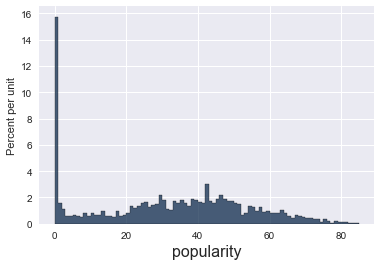

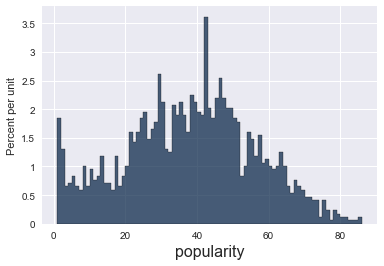

In [4]:
bins = np.arange(min(nums['popularity']), max(nums['popularity']))
nums.hist('popularity', bins=bins)
nums.hist('popularity', bins=bins+1)

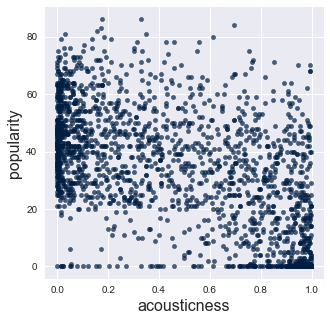

In [5]:
nums.scatter(1, 0)

### Multi Regression

In [6]:
def su(x):
    return (x - np.mean(x))/np.std(x)

def correlation(tbl, x, y):
    return np.mean(su(tbl[x]) * su(tbl[y]))

def slope(tbl, x, y):
    return correlation(tbl, x, y) * np.std(tbl[y])/np.std(tbl[x])

def intercept(tbl, x, y):
    return np.mean(tbl[y]) - slope(tbl, x, y) * np.mean(tbl[x])

def pred(tbl, x, y, x1):
    return slope(tbl, x, y)*x1 + intercept(tbl, x, y)

In [7]:
for label in nums.labels:
    print('Correlation of', label, 'and Popularity:\t', correlation(nums, label, 'popularity'))


Correlation of popularity and Popularity:	 1.0
Correlation of acousticness and Popularity:	 -0.607489213611037
Correlation of danceability and Popularity:	 0.2095981361570587
Correlation of energy and Popularity:	 0.49223405743468884
Correlation of explicit and Popularity:	 0.2365624654804973
Correlation of instrumentalness and Popularity:	 -0.32313817778142107
Correlation of key and Popularity:	 0.03393919121396701
Correlation of liveness and Popularity:	 -0.07568739180638953
Correlation of loudness and Popularity:	 0.4726700270275223
Correlation of mode and Popularity:	 0.008258486789412335
Correlation of speechiness and Popularity:	 -0.14164426222529355
Correlation of tempo and Popularity:	 0.14299302316440562
Correlation of valence and Popularity:	 -0.017773935925232485


In [8]:
de = nums['danceability'] + nums['explicit']
correlation(nums.with_column('D&E', de), 'popularity', 'D&E') # Better correlation than either of them

0.2828273917571516

In [9]:
# nums = nums.drop('acousticness', 'instrumentalness') # Removing these two attributes didn't make a difference
nums = nums.sample(2002) # Taking a small sample as dataset is just too huge
train_num = int(nums.num_rows * 1/2)
train, test = nums.split(train_num)
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

1001 training and 1001 test instances.


In [10]:
def predict(slopes, row):
    return sum(slopes * np.array(row))

example_row = test.drop('popularity').row(0)
print('Predicting popularity for:', example_row)
example_slopes = np.random.normal(1, 0.25, len(example_row))
print('Using slopes:', example_slopes)
print('Result:', predict(example_slopes, example_row))


Predicting popularity for: Row(acousticness=0.0257, danceability=0.8809999999999999, energy=0.636, explicit=0, instrumentalness=0.000257, key=4, liveness=0.207, loudness=-13.617, mode=0, speechiness=0.156, tempo=108.863, valence=0.616)
Using slopes: [1.06756973 1.23309051 1.30337889 1.33632253 1.14753374 1.05552926
 0.8048374  1.31462837 1.24309633 0.7769958  0.71489998 0.81411992]
Result: 66.87932257554023


In [11]:
print('Actual popularity:', test.column('popularity').item(0))
print('Predicted popularity using random slopes:', predict(example_slopes, example_row))

Actual popularity: 41
Predicted popularity using random slopes: 66.87932257554023


In [12]:
train_prices = train.column(0)
train_attributes = train.drop(0)

def rmse(slopes, attributes, prices):
    errors = []
    for i in np.arange(len(prices)):
        predicted = predict(slopes, attributes.row(i))
        actual = prices.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_prices)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 52.83334340345747


In [13]:
best_slopes = minimize(rmse_train, start=example_slopes, smooth=True, array=True)
print('The best slopes for the training set:')
Table(train_attributes.labels).with_row(list(best_slopes)).show()
print('RMSE of all training examples using the best slopes:', rmse_train(best_slopes))

The best slopes for the training set:


acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
-15.747,31.9147,31.8373,12.6156,-7.25311,0.346601,-5.75564,-0.562449,4.37978,-36.2702,0.109133,-23.2451


RMSE of all training examples using the best slopes: 16.337795835926563


In [14]:
test_prices = test.column(0)
test_attributes = test.drop(0)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_prices)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 15.318413692321627


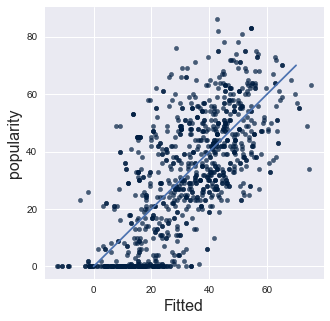

In [15]:
def fit(row):
    return sum(best_slopes * np.array(row))

test.with_column('Fitted', test.drop(0).apply(fit)).scatter('Fitted', 0)
plt.plot([0, 70], [0, 70])
plt.show()


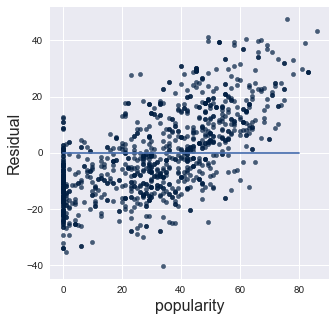

In [16]:
test.with_column('Residual', test_prices-test.drop(0).apply(fit)).scatter(0, 'Residual')
plt.plot([0, 80], [0, 0]);


### Nearest Neighbour for Regression

In [17]:
high_correlation_labels = ['popularity', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']
train_nn = train.select(high_correlation_labels)
test_nn = test.select(high_correlation_labels)
train_nn.show(3)

popularity,danceability,energy,explicit,loudness,tempo
0,0.356,0.0644,0,-18.673,139.621
41,0.393,0.523,0,-15.001,93.125
9,0.445,0.38,0,-10.523,176.955


In [18]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2))

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))

example_nn_row = test_nn.drop(0).row(0)
closest(train_nn, example_nn_row, 5, 'popularity')


popularity,danceability,energy,explicit,loudness,tempo,Distance
2,0.699,0.197,0,-14.736,108.656,1.23323
2,0.699,0.197,0,-14.736,108.656,1.23323
21,0.383,0.28,0,-14.503,110.302,1.79735
0,0.516,0.34,0,-13.932,110.763,1.98244
56,0.394,0.345,0,-12.042,107.647,2.06909


In [19]:
def predict_nn(example, label='popularity'):
    """Return the majority class among the k nearest neighbors."""
    return np.average(closest(train_nn, example, 5, label).column(label))

predict_nn(example_nn_row)


16.2

In [20]:
print('Actual popularity:', test_nn.column('popularity').item(0))
print('Predicted popularity using nearest neighbors:', predict_nn(example_nn_row))


Actual popularity: 41
Predicted popularity using nearest neighbors: 16.2


In [21]:
nn_test_predictions = test_nn.drop('popularity').apply(predict_nn)
rmse_nn = np.mean((test_prices - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for multiple linear regression: ', rmse_linear)
print('Test set RMSE for nearest neighbor regression:', rmse_nn)


Test set RMSE for multiple linear regression:  15.318413692321627
Test set RMSE for nearest neighbor regression: 18.46715257628323


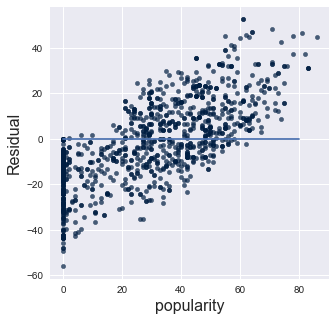

In [22]:
# Can fake this, as code is not submitted
test.with_column('Residual', test_prices-nn_test_predictions).scatter(0, 'Residual')
plt.plot([0, 80], [0, 0]);


####  Explicit

In [23]:
# high_correlation_labels = ['popularity', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']
train_nn = train#.select(high_correlation_labels)
test_nn = test#.select(high_correlation_labels)
train_nn.show(3)

popularity,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.988,0.356,0.0644,0,0.593,3,0.172,-18.673,1,0.0323,139.621,0.274
41,0.616,0.393,0.523,0,0.954,2,0.126,-15.001,0,0.0306,93.125,0.757
9,0.742,0.445,0.38,0,0.036,8,0.104,-10.523,1,0.0431,176.955,0.636


In [24]:
example_nn_row = test_nn.drop(0).row(0)

In [25]:
closest(train_nn, example_nn_row, 5, 'explicit')

popularity,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,Distance
2,0.94,0.699,0.197,0,0.000316,5,0.136,-14.736,1,0.0565,108.656,0.615,2.69334
2,0.94,0.699,0.197,0,0.000316,5,0.136,-14.736,1,0.0565,108.656,0.615,2.69334
0,0.977,0.66,0.215,0,5.69e-06,5,0.782,-17.501,1,0.0938,107.809,0.561,4.31168
0,0.995,0.516,0.34,0,0.931,8,0.357,-13.932,0,0.0611,110.763,0.907,4.56458
0,0.824,0.572,0.642,0,0.00307,2,0.667,-10.077,0,0.0395,106.501,0.614,4.77032


In [26]:
predict_nn(example_nn_row, 'explicit')

0.0

In [27]:
print('Actual explicit:', test_nn.column('explicit').item(0))
print('Predicted explicit using nearest neighbors:', predict_nn(example_nn_row, 'explicit'))

Actual explicit: 0
Predicted explicit using nearest neighbors: 0.0


In [28]:
def predict_nn_explicit(example):
    """Return the majority class among the k nearest neighbors."""
    return np.average(closest(train_nn, example, 5, 'explicit').column('explicit'))

predict_nn_explicit(example_nn_row)


0.0

In [29]:
nn_test_predictions = test_nn.drop('explicit').apply(predict_nn_explicit)
rmse_nn = np.mean((test_prices - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for multiple linear regression: ', rmse_linear)
print('Test set RMSE for nearest neighbor regression:', rmse_nn)

Test set RMSE for multiple linear regression:  15.318413692321627
Test set RMSE for nearest neighbor regression: 37.631471833130206


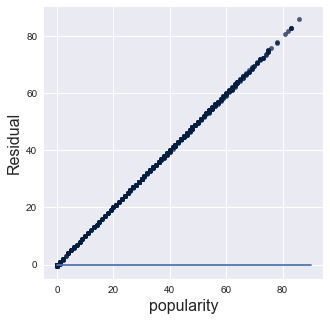

In [30]:
# Can fake this, as code is not submitted
test.with_column('Residual', test_prices-nn_test_predictions).scatter(0, 'Residual')
plt.plot([0, 90], [0, 0]);


### Other Ideas
##### A/B Testing
##### Predicting Popularity Intervals

### Make this Quadratic (Not Working, as of now)
